In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

ModuleNotFoundError: No module named 'matplotlib'

Set up the simulation of the Hodgkin/Huxley Equations (V_HH = -V-65), with current definition of membrane potential (V=Vin-Vout)

## The HH model

set the constants

In [3]:
vna=50;  
vk=-77;
vl=-54.4;
gna=120;
gk=36;
gl=.3;
c=1;

In [4]:
v_init=-65;  #the initial conditions
m_init=.052;
h_init=.596;
n_init=.317;

nsteps=50000   #number of timesteps to integrate
dt=0.01        #timestep, units of ms

Set up arrays to hold dynamical variables

In [5]:
v=np.zeros([nsteps])
m=np.zeros([nsteps])
n=np.zeros([nsteps])
h=np.zeros([nsteps])
t=np.zeros([nsteps])

# set the initial conditions to be the first entry in the vectors

m[0]=m_init; #set the initial conditions to be the first entry in the vectors
n[0]=n_init;
h[0]=h_init;
v[0]=v_init;
t[0]=0.0;

### Define functions -- channel opening and closing rates 

In [6]:
def beta_n(v):
    r =.125*np.exp(-(v+65)/80);
    return r

def beta_m(v):
    r =  4*np.exp(-(v+65)/18);
    return r

def beta_h(v):
    r =  1/(1+np.exp(-(v+35)/10));
    return r

def alpha_n(v):
    r =  .01*(v+55)/(1-np.exp(-(v+55)/10));
    return r

def alpha_m(v):
    r =  .1*(v+40)/(1-np.exp(-(v+40)/10));
    return r

def alpha_h(v):
    r =  .07*np.exp(-(v+65)/20);
    return r



# Set the applied INPUT current I, and run simulation

Text(0, 0.5, 'v')

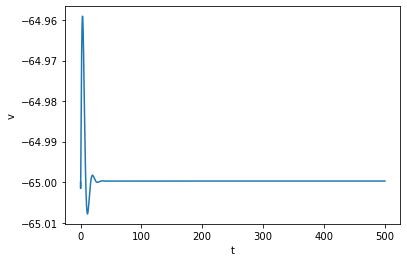

In [8]:
I=0

iter_arr=np.arange(nsteps-1)

for step in iter_arr:
    v[step+1]=v[step]+((I - gna*h[step]*(v[step]-vna)*m[step]**3 -gk*(v[step]-vk)*n[step]**4-gl*(v[step]-vl))/c)*dt;
    m[step+1]=m[step]+ (alpha_m(v[step])*(1-m[step])-beta_m(v[step])*m[step])*dt;
    h[step+1]=h[step]+ (alpha_h(v[step])*(1-h[step])-beta_h(v[step])*h[step])*dt;
    n[step+1]=n[step]+ (alpha_n(v[step])*(1-n[step])-beta_n(v[step])*n[step])*dt;
    t[step+1]=t[step]+dt;

plt.plot(t,v)
plt.xlabel('t')
plt.ylabel('v')